### Exploration of Interactions between Trade, Gross Domestic Product (GDP) and Foreign Direct Investments (FDI)  

### Part 1: Introduction

In the line of my work, I have to manage issues related to geo-politics and economics. As a Singaporean, I have also grown up viewing that the survival and prosperity of our city state is dependent on Singapore being open to trade and foreign investments. While it appears to be a common wisdom that openess to FDI and trade should encourage economic growth with GDP growth as a proxy, this assignment allows me to better understand this idea via visualization techniques. I shall be exploring the impact on GDP growth by FDI inflows/outflows, trade growth and current account balances  

#### Visualisation Technqiues

This exploration requires me to understand the relations between multiple economic data. This includes annual GDP growth, annual trade growth, annual FDI inflow, annual FDI outflow amongst others. We shall be using bivariate visualisation technqiues, particularly scatter plot and its variants. The scatter plot is a simple but yet powerful technqiue. In such a plot, the data points are plotted against the two variables whose relations are being analysed to determine trend. Enhancement to the scatterplots in terms of add-ons that allows identification of clusters and concentration of data points further magnifies the power of the scatterplot. Such enhancements include the adjustment in colors and size of the data points on the scatter plots to differentiate categories (particularly qualitative ones) and better discern trends. Besides the simplicity of the technique and its aim not being to quantitatively describe relations, rather to demonstrate broad trends, it is also not senstive to outliers. As we are examining the relations between two variables, we will also use a heatmap visualization technique to better identify the stronger correlation between the various economic variables being analysed. 

On its disadvantages, the simplicity of the scatterplot inherently present its with significant intrinsic weaknesses for deeper and more quantitative analysis. First, the scatterplot in its simplest form is limited to examining the relations between two quantitative variables, and it will not be able to handle more than that. Second, the scatterplot is intended to demonstrate broadtrend rather than precisely measure relations. Hence, it will not be able to derieve quantitative coefficients of the relations between variables. Third, should the data set contains many data points with the same value, the scatter plot will not be effective in highlighting the trends.   

#### Visualization Library

I shall be using the Seaborn library for this exercise. Seaborn is a high - level open-source visualization libray that is built on Matplotlib. It is created by Michael Waskom in 2012, and since then has become one of the most popular visualisation library for python. Seaborn is fully integrated with Jupyter and Panda, and can be installed via common installations such as PIP oR conda install. The key strengths of Seaborn are as follows. One, as a high level interface to Matplotlib, it has significantly simpler syntaxes that enabled users to create the visualizations they need in a significantly shorter period with fewer steps than Matplotlib. Two, Seaborn has more appealing asethetics for its visualization than the base Matplotlib. Its colors, themes and related visualisation details are more attractive than Matplotlib, and users can access and employ them easily. Third, Seaborn can work directly and easily with Pandas dataframe, and given the prevalence of Pandas, this lowers the barrier of resistance to its usage, especially for new programmers and data scientists. As a high level interface, Seaborn handles the majority of the detailed steps to achieve the required visualization 'under the hood' and is hence inherently uses a declarative programming approach whereby users 'states' what they require and the library handles the bulk of the grind. 

As a high-level interface, Seaborn is inherently simpler to use, but while its asthetics and simplicity is superior, Matplotlib has singificantly superior fine controls of the visualizations that enable advanced users to produce visualizations at a much higher level of customisation than Seaborn, albeit with more intensive efforts.  

I have elected to use Seaborn for this visualization exercise for the following reasons. One, Seaborn is more than capable to handle the scatter plot (and variants) visualizations that I will predominantly be using. Furthermore, the data will larley be in Panda Dataframes and I will be working in Jupyter Notebook. The direct native support for Pandas by Seaborn is critical for this visual exploration effort. Two, the various libraries that enhances the scatter plot such as Kernel Density Estimation and the Heatmap function of Seaborn, both of which I will describe later, will strengthen my analysis. Three, for exploratory analysis, I do not require the advanced functionalities of Seaborn and the ease and speed with which Seaborn can perform the visualization are appealing.    



#### Installation of Seaborn

##### To install Seaborn via pip, type the following command:

pip install seaborn

##### To install plotly using conda, type the following command:

conda install seaborn

### Part 2: Import Libraries

We will install the following libraries for data preparation and visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import wget
%matplotlib inline

### Part 3: Import  and Prepare Data

The relevant data are downloade from the World Bank Data Cente at https://data.worldbank.org/ . Where possible. the data in % of GDP is selected to normalize the data between the countries, given the enormous disparity in absolute figures for the economic data. The download can be performed through wget via the links below. Uncomment the wget lines to commence downloand

In [2]:
#download GDP per capita (current USD) data
url='https://api.worldbank.org/v2/en/indicator/NY.GDP.PCAP.CD?downloadformat=csv'
#wget.download(url)

#download GDP growth (annual %)
url='https://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.KD.ZG?downloadformat=csv'
#wget.download(url)

#download Trade (% of GDP)
url='https://api.worldbank.org/v2/en/indicator/NE.TRD.GNFS.ZS?downloadformat=csv'
#wget.download(url)

#download current account balance (% of GDP)
url='https://api.worldbank.org/v2/en/indicator/BN.CAB.XOKA.GD.ZS?downloadformat=csv'
#wget.download(url)

#download FDI net inflows (% of GDP)
url='https://api.worldbank.org/v2/en/indicator/BX.KLT.DINV.WD.GD.ZS?downloadformat=csv'
#wget.download(url)

#download FDI net outflow (% of GDP)
url='https://api.worldbank.org/v2/en/indicator/BM.KLT.DINV.WD.GD.ZS?downloadformat=csv'
#wget.download(url)

The downloaded folders should be unzipped and the largest csv file with the folder are the main data files for our exercise. Rename the main data files as

- Rename 'API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2055804.csv' as 'gdp_per_capita.csv' [GDP per capita (current USD)]

- Rename 'Metadata_Country_API_NY.GDP.PCAP.CD_DS2_en_csv_v2_2055804.csv' as 'meta_data.csv' This files contains the 'Income Group' data that categories the countries into different levels of income and 'Regions' that categories countries into the different regions of the world

- Rename 'API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_2055665.csv' as 'gdp annual growth percent.csv' **[GDP growth (annual %)]**

- Rename 'API_NE.TRD.GNFS.ZS_DS2_en_csv_v2_2058729.csv' as 'trade_percent_gdp.csv' **[Trade (% of GDP)]**

- Rename 'API_BN.CAB.XOKA.GD.ZS_DS2_en_csv_v2_2055721.csv' as 'current_account_gdp.csv' **[current account balance (% of GDP)]**

- Rename 'API_BX.KLT.DINV.WD.GD.ZS_DS2_en_csv_v2_2077964.csv' as 'fdi_inflow_percent_gdp.csv' **[FDI net inflows (% of GDP)]**

- Rename 'API_BM.KLT.DINV.WD.GD.ZS_DS2_en_csv_v2_2055599.csv' as 'fdi_outflow_percent_gdp.csv' **[FDI net outflow (% of GDP)]**

Tranfer all renames files to folder 'assets'

In [3]:
#dp_grow=pd.read_csv('assets/gdp annual growth percent.csv',header=2)

<span style='color:red'>GDP Growth:</span>
Take the 20 years of annual GDP growth % for all countries from 2000 t0 2019. Omit 2020 as data not as complete and avoid skewering due to pandemic. strip() and convert column headers to lowercase for standardisation.

In [4]:
gdp_grow=pd.read_csv('assets/gdp annual growth percent.csv',header=2)
gdp_grow=gdp_grow[['Country Name','Country Code','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']]
gdp_grow=gdp_grow.dropna()
gdp_grow['Country Name']=gdp_grow['Country Name'].apply(lambda x:x.strip())
gdp_grow['Country Code']=gdp_grow['Country Code'].apply(lambda x:x.strip())

#compute average of annual GDP for five years from 2015-2019 to smooth data
#Then drop annual gdp growth data for 2000-2019 as no longer needed 
gdp_grow['average gdp annual growth % 2000-2019']=gdp_grow[['2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019']].mean(axis=1)
gdp_grow=gdp_grow[['Country Name','Country Code','average gdp annual growth % 2000-2019']]
gdp_grow.columns=['country','country code','average gdp annual growth % 2000-2019']
gdp_grow.head()

,country,country code,average gdp annual growth % 2000-2019
2,Angola,AGO,5.463190
3,Albania,ALB,4.258674
4,Andorra,AND,1.742445
5,Arab World,ARB,3.866833
6,United Arab Emirates,ARE,4.232068


<span style='color:red'>Country Meta Data:</span>
Retain 'Country Code' [unique three letter identifier for each country],'Income Group' and 'Region'. strip() and convet to lower case for standardisation 

In [5]:
#meta data
mdata=pd.read_csv('assets/meta_data.csv')
mdata=mdata[['Country Code', 'Region', 'IncomeGroup']]
mdata['Country Code']=mdata['Country Code'].apply(lambda x:x.strip())
mdata['Region']=mdata['Region'].apply(lambda x:str(x).strip())
mdata['IncomeGroup']=mdata['IncomeGroup'].apply(lambda x:str(x).strip())
mdata.columns=['country code','region','income group']
mdata.head()

,country code,region,income group
0,ABW,Latin America & Caribbean,High income
1,AFG,South Asia,Low income
2,AGO,Sub-Saharan Africa,Lower middle income
3,ALB,Europe & Central Asia,Upper middle income
4,AND,Europe & Central Asia,High income


Merge <span style='color:red'>Country Meta Data:</span> and <span style='color:red'>GDP Growth:</span>. Merge on 'Country Code'

In [6]:
#combine meta data with gdp data
df_a=gdp_grow.merge(mdata,how='inner')
gdp_grow=df_a
gdp_grow.head()

,country,country code,average gdp annual growth % 2000-2019,region,income group
0,Angola,AGO,5.463190,Sub-Saharan Africa,Lower middle income
1,Albania,ALB,4.258674,Europe & Central Asia,Upper middle income
2,Andorra,AND,1.742445,Europe & Central Asia,High income
3,Arab World,ARB,3.866833,nan,nan
4,United Arab Emirates,ARE,4.232068,Middle East & North Africa,High income


<span style='color:red'>GDP Per Capita USD:</span>
Take the 20 years of annual GDP per capita in USD for all countries from 2000 t0 2019. Omit 2020 as data not as complete and avoids the risks of skewering due to pandemic. strip() and convert column headers to lowercase for standardisation.

In [7]:
#gdp per capita
gdp_per_cap=pd.read_csv('assets/gdp_per_capita.csv',header=2)
gdp_per_cap.head()
gdp_per_cap=gdp_per_cap[['Country Name','2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019']]

#compute average of gdp per capita from 2000-2019 to smooth data
#Then drop data for 2000-2019 as no longer needed 
gdp_per_cap['average gdp per capita USD 2000-2019']=gdp_per_cap[['2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019']].mean(axis=1)
gdp_per_cap['Country Name']=gdp_per_cap['Country Name'].apply(lambda x:x.strip())
gdp_per_cap=gdp_per_cap[['Country Name','average gdp per capita USD 2000-2019']]
gdp_per_cap.columns=['country','average gdp per capita USD 2000-2019']
gdp_per_cap.head()

,country,average gdp per capita USD 2000-2019
0,Aruba,24519.197230
1,Afghanistan,438.081704
2,Angola,3041.943758
3,Albania,3539.786651
4,Andorra,38074.895868


<span style='color:red'>Trade as percent of GDP:</span>
Take the 20 years of annual GDP per capita in USD for all countries from 2015 t0 2019. Omit 2020 as data not as complete and avoids the risks of skewering due to pandemic. strip() and convert column headers to lowercase for standardisation

In [8]:
#trade as percent of gdp
trade_per_gdp=pd.read_csv('assets/trade_percent_gdp.csv',header=2)
trade_per_gdp=trade_per_gdp[['Country Name','2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019']]
trade_per_gdp=trade_per_gdp.dropna()
trade_per_gdp['Country Name']=trade_per_gdp['Country Name'].apply(lambda x:x.strip())

#compute average of annual trade as % of gdp from 2015-2019 to smooth data
#Then drop data for 2015-2019 as no longer needed 
trade_per_gdp['average trade % gdp 2015-2019']=trade_per_gdp[['2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019']].mean(axis=1)
trade_per_gdp=trade_per_gdp[['Country Name', 'average trade % gdp 2015-2019']]
trade_per_gdp.columns=['country', 'average trade % gdp 2000-2019']
trade_per_gdp.head()

,country,average trade % gdp 2000-2019
2,Angola,96.727386
3,Albania,73.876623
5,Arab World,86.784315
7,Argentina,33.003564
8,Armenia,72.785622


<span style='color:red'>Trade growth as percent of GDP:</span>
The annual growth in trade, expressed as percentage of previous year GDP, is computed as below for 2000 to 2019. The data is not available from the World Bank and have to be computed as shown below. The variable is derived to allow comparison between annual GDP growth % and annual trade growth % which both uses the previous year GDP as base.
Omit 2020 as data not as complete and avoids the risks of skewering due to pandemic. strip() and convert column headers to lowercase for standardisation

In [9]:
#trade growth as percent of gdp
trade_growth_gdp=pd.read_csv('assets/trade_percent_gdp.csv',header=2)
trade_growth_gdp=trade_growth_gdp[['Country Name','1999','2000', '2001', '2002', '2003', '2004','2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013','2014', '2015', '2016', '2017', '2018', '2019']]
trade_per_gdp=trade_per_gdp.dropna()
trade_growth_gdp['Country Name']=trade_growth_gdp['Country Name'].apply(lambda x:x.strip())
trade_growth_gdp['2000 growth']=(trade_growth_gdp['2000']-trade_growth_gdp['1999'])/trade_growth_gdp['1999']
trade_growth_gdp['2001 growth']=(trade_growth_gdp['2001']-trade_growth_gdp['2000'])/trade_growth_gdp['2000']
trade_growth_gdp['2002 growth']=(trade_growth_gdp['2002']-trade_growth_gdp['2001'])/trade_growth_gdp['2001']
trade_growth_gdp['2003 growth']=(trade_growth_gdp['2003']-trade_growth_gdp['2002'])/trade_growth_gdp['2002']
trade_growth_gdp['2004 growth']=(trade_growth_gdp['2004']-trade_growth_gdp['2003'])/trade_growth_gdp['2003']
trade_growth_gdp['2005 growth']=(trade_growth_gdp['2005']-trade_growth_gdp['2004'])/trade_growth_gdp['2004']
trade_growth_gdp['2006 growth']=(trade_growth_gdp['2006']-trade_growth_gdp['2005'])/trade_growth_gdp['2005']
trade_growth_gdp['2007 growth']=(trade_growth_gdp['2007']-trade_growth_gdp['2006'])/trade_growth_gdp['2006']
trade_growth_gdp['2008 growth']=(trade_growth_gdp['2008']-trade_growth_gdp['2007'])/trade_growth_gdp['2007']
trade_growth_gdp['2009 growth']=(trade_growth_gdp['2009']-trade_growth_gdp['2008'])/trade_growth_gdp['2008']
trade_growth_gdp['2010 growth']=(trade_growth_gdp['2010']-trade_growth_gdp['2009'])/trade_growth_gdp['2009']
trade_growth_gdp['2011 growth']=(trade_growth_gdp['2011']-trade_growth_gdp['2010'])/trade_growth_gdp['2010']
trade_growth_gdp['2012 growth']=(trade_growth_gdp['2012']-trade_growth_gdp['2011'])/trade_growth_gdp['2011']
trade_growth_gdp['2013 growth']=(trade_growth_gdp['2013']-trade_growth_gdp['2012'])/trade_growth_gdp['2012']
trade_growth_gdp['2014 growth']=(trade_growth_gdp['2014']-trade_growth_gdp['2013'])/trade_growth_gdp['2013']
trade_growth_gdp['2015 growth']=(trade_growth_gdp['2015']-trade_growth_gdp['2014'])/trade_growth_gdp['2014']
trade_growth_gdp['2016 growth']=(trade_growth_gdp['2016']-trade_growth_gdp['2015'])/trade_growth_gdp['2015']
trade_growth_gdp['2017 growth']=(trade_growth_gdp['2017']-trade_growth_gdp['2016'])/trade_growth_gdp['2016']
trade_growth_gdp['2018 growth']=(trade_growth_gdp['2018']-trade_growth_gdp['2017'])/trade_growth_gdp['2017']
trade_growth_gdp['2019 growth']=(trade_growth_gdp['2019']-trade_growth_gdp['2018'])/trade_growth_gdp['2018']
trade_growth_gdp['average trade growth % gdp 2000-2019']=trade_growth_gdp[['2000 growth', '2001 growth', '2002 growth', '2003 growth', '2004 growth','2005 growth', '2006 growth', '2007 growth', '2008 growth', '2009 growth','2010 growth', '2011 growth', '2012 growth', '2013 growth', '2014 growth','2015 growth', '2016 growth', '2017 growth', '2018 growth', '2019 growth']].mean(axis=1)
trade_growth_gdp=trade_growth_gdp[['Country Name','average trade growth % gdp 2000-2019']]
trade_growth_gdp.columns=['country','average trade growth % gdp 2000-2019']
trade_growth_gdp['average trade growth % gdp 2000-2019']=trade_growth_gdp['average trade growth % gdp 2000-2019']*100
trade_growth_gdp=trade_growth_gdp.dropna()
trade_growth_gdp.head()

,country,average trade growth % gdp 2000-2019
0,Aruba,-0.538250
2,Angola,-3.280956
3,Albania,2.285684
5,Arab World,1.277364
6,United Arab Emirates,3.459403


<span style='color:red'>Current account balance percent of GDP:</span>
Take the 20 years of annual current account balance as % of GDP for all countries from 2000 t0 2019. Omit 2020 as data not as complete and avoids the risks of skewering due to pandemic. strip() and convert column headers to lowercase for standardisation. Current account balance is broadly net exports minus net imports, and indicates if a country is exporter (positive) or importer (negative)

In [10]:
#current account balance as percent of gdp
cur_acc_bal_gdp=pd.read_csv('assets/current_account_gdp.csv',header=2)
cur_acc_bal_gdp=cur_acc_bal_gdp[['Country Name','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']]
cur_acc_bal_gdp=cur_acc_bal_gdp.dropna()
cur_acc_bal_gdp['Country Name']=cur_acc_bal_gdp['Country Name'].apply(lambda x:x.strip())


#compute average of current account balance % of gdp from 2000-2019 to smooth data
#Then drop data for 2000-2019 as no longer needed 
cur_acc_bal_gdp['average current account balance % gdp 2000-2019']=cur_acc_bal_gdp[['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']].mean(axis=1)
cur_acc_bal_gdp=cur_acc_bal_gdp[['Country Name', 'average current account balance % gdp 2000-2019']]
cur_acc_bal_gdp.columns=['country', 'average current account balance % gdp 2000-2019']
cur_acc_bal_gdp.head()

,country,average current account balance % gdp 2000-2019
2,Angola,3.699055
3,Albania,-9.049958
7,Argentina,0.071280
8,Armenia,-7.613950
11,Australia,-4.100276


<span style='color:red'>FDI inflow as percent of GDP:</span>
Take the 20 years of FDI inflow as % of GDP for all countries from 2000 t0 2019. Omit 2020 as data not as complete and avoids the risks of skewering due to pandemic. strip() and convert column headers to lowercase for standardisation. 

In [11]:
#fdi inflow as percent of gdp
fdi_inflow_gdp=pd.read_csv('assets/fdi_inflow_percent_gdp.csv',header=2)
fdi_inflow_gdp=fdi_inflow_gdp[['Country Name','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']]
fdi_inflow_gdp=fdi_inflow_gdp.dropna()


#compute average of annual fdi inflow % of gdp from 2015-2019 to smooth data
#Then drop data for 2000-2019 as no longer needed 
fdi_inflow_gdp['average fdi inflow % gdp 2000-2019']=fdi_inflow_gdp[['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']].mean(axis=1)
fdi_inflow_gdp['Country Name']=fdi_inflow_gdp['Country Name'].apply(lambda x:x.strip())
fdi_inflow_gdp=fdi_inflow_gdp[['Country Name', 'average fdi inflow % gdp 2000-2019']]
fdi_inflow_gdp.columns=['country','average fdi inflow % gdp 2000-2019']
fdi_inflow_gdp.head()

,country,average fdi inflow % gdp 2000-2019
2,Angola,2.776431
3,Albania,6.934764
5,Arab World,2.239402
6,United Arab Emirates,2.833255
7,Argentina,2.002883


<span style='color:red'>FDI outflow as percent of GDP:</span>
Take the 20 years of FDI outflow as % of GDP for all countries from 2000 t0 2019. Omit 2020 as data not as complete and avoids the risks of skewering due to pandemic. strip() and convert column headers to lowercase for standardisation. 

In [12]:
#fdi outflow as percent of gdp
fdi_outflow_gdp=pd.read_csv('assets/fdi_outflow_percent_gdp.csv',header=2)
fdi_outflow_gdp=fdi_outflow_gdp[['Country Name','2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']]
fdi_outflow_gdp=fdi_outflow_gdp.dropna()

#compute average of annual fdi outflow as % of gdp from 2015-2019 to smooth data
#Then drop data for 2000-2019 as no longer needed 
fdi_outflow_gdp['average fdi outflow % gdp 2000-2019']=fdi_outflow_gdp[['2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019']].mean(axis=1)
fdi_outflow_gdp['Country Name']=fdi_outflow_gdp['Country Name'].apply(lambda x:x.strip())
fdi_outflow_gdp=fdi_outflow_gdp[['Country Name', 'average fdi outflow % gdp 2000-2019']]
fdi_outflow_gdp.columns=['country','average fdi outflow % gdp 2000-2019']
fdi_outflow_gdp.head()

,country,average fdi outflow % gdp 2000-2019
2,Angola,0.664668
3,Albania,0.505992
5,Arab World,1.186976
6,United Arab Emirates,2.462220
7,Argentina,0.307534


Merge all dataframes to form <span style='color:blue'>gdp_fdi_trade_cur:</span>. This is the starting data set for visualization to explore the relations between Trade, FDI and GDP. Of note, this data set only summarizes the key data from 2015-2019 period

In [13]:
#merge all dataframes via 'inner'
df1=gdp_per_cap.merge(gdp_grow,how='inner')
df2=df1.merge(trade_per_gdp,how='inner')
df3=df2.merge(trade_growth_gdp,how='inner')
df4=df3.merge(cur_acc_bal_gdp,how='inner')
df5=df4.merge(fdi_outflow_gdp,how='inner')
gdp_fdi_trade_cur=df5.merge(fdi_inflow_gdp,how='inner')
gdp_fdi_trade_cur=gdp_fdi_trade_cur[['country','region', 'income group','average gdp per capita USD 2000-2019',
                                     'average gdp annual growth % 2000-2019','average trade % gdp 2000-2019',
                                     'average trade growth % gdp 2000-2019',
                                     'average current account balance % gdp 2000-2019',
                                     'average fdi inflow % gdp 2000-2019',
                                     'average fdi outflow % gdp 2000-2019']]

gdp_fdi_trade_cur.head()

,country,region,income group,average gdp per capita USD 2000-2019,average gdp annual growth % 2000-2019,average trade % gdp 2000-2019,average trade growth % gdp 2000-2019,average current account balance % gdp 2000-2019,average fdi inflow % gdp 2000-2019,average fdi outflow % gdp 2000-2019
0,Angola,Sub-Saharan Africa,Lower middle income,3041.943758,5.463190,96.727386,-3.280956,3.699055,2.776431,0.664668
1,Albania,Europe & Central Asia,Upper middle income,3539.786651,4.258674,73.876623,2.285684,-9.049958,6.934764,0.505992
2,Argentina,Latin America & Caribbean,Upper middle income,9256.419831,1.981553,33.003564,3.878497,0.071280,2.002883,0.307534
3,Armenia,Europe & Central Asia,Upper middle income,2818.806488,6.575000,72.785622,1.798631,-7.613950,4.826357,0.242462
4,Australia,East Asia & Pacific,High income,45244.582564,2.914264,41.925449,0.917382,-4.100276,3.456057,1.106107


data_no_norm=gdp_fdi_trade_cur[['country','region', 'income group','average gdp per capita USD 2000-2019']]

data_to_norm=gdp_fdi_trade_cur[['average gdp annual growth % 2000-2019','average trade % gdp 2000-2019',
                                'average trade growth % gdp 2000-2019',
                                'average current account balance % gdp 2000-2019',
                                'average fdi inflow % gdp 2000-2019',
                                'average fdi outflow % gdp 2000-2019']]

def normalize(dataset):
    data_norm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return data_norm

data_norm=normalize(data_to_norm)
gdp_fdi_trade_cur=pd.concat([data_no_norm,data_norm],axis=1)
print(gdp_fdi_trade_cur.shape)
gdp_fdi_trade_cur.head()

In [14]:
gdp_fdi_trade_cur.columns=['country','region', 'income group', 'average gdp per capita USD',
                           'average gdp annual growth %','average trade % gdp',
                           'average trade growth % gdp',
                           'average current account balance % gdp',
                           'average fdi inflow % gdp',
                           'average fdi outflow % gdp']

gdp_fdi_trade_cur=gdp_fdi_trade_cur.dropna()
gdp_fdi_trade_cur=gdp_fdi_trade_cur.round(2)
gdp_fdi_trade_cur=gdp_fdi_trade_cur.set_index('country')
#check the dataframe for formatting errors
gdp_fdi_trade_cur.head()

,region,income group,average gdp per capita USD,average gdp annual growth %,average trade % gdp,average trade growth % gdp,average current account balance % gdp,average fdi inflow % gdp,average fdi outflow % gdp
country,,,,,,,,,
Angola,Sub-Saharan Africa,Lower middle income,3041.94,5.46,96.73,-3.28,3.70,2.78,0.66
Albania,Europe & Central Asia,Upper middle income,3539.79,4.26,73.88,2.29,-9.05,6.93,0.51
Argentina,Latin America & Caribbean,Upper middle income,9256.42,1.98,33.00,3.88,0.07,2.00,0.31
Armenia,Europe & Central Asia,Upper middle income,2818.81,6.57,72.79,1.80,-7.61,4.83,0.24
Australia,East Asia & Pacific,High income,45244.58,2.91,41.93,0.92,-4.10,3.46,1.11


We will rename the <span style='color:blue'>gdp_fdi_trade_cur</span> dataframe to <span style='color:blue'>GFTC</span> for ease of calling in future

In [15]:
#check the dataframe for formatting errors
GFTC=gdp_fdi_trade_cur
GFTC.info()
GFTC.columns

<class 'pandas.core.frame.DataFrame'>
Index: 90 entries, Angola to South Africa
Data columns (total 9 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   region                                 90 non-null     object 
 1   income group                           90 non-null     object 
 2   average gdp per capita USD             90 non-null     float64
 3   average gdp annual growth %            90 non-null     float64
 4   average trade % gdp                    90 non-null     float64
 5   average trade growth % gdp             90 non-null     float64
 6   average current account balance % gdp  90 non-null     float64
 7   average fdi inflow % gdp               90 non-null     float64
 8   average fdi outflow % gdp              90 non-null     float64
dtypes: float64(7), object(2)
memory usage: 7.0+ KB


Index(['region', 'income group', 'average gdp per capita USD',
       'average gdp annual growth %', 'average trade % gdp',
       'average trade growth % gdp', 'average current account balance % gdp',
       'average fdi inflow % gdp', 'average fdi outflow % gdp'],
      dtype='object')

### Part 4: Visualization

The pandas functionality for correlation is called on the various quantitative variables to discern correlations. This returns the Pearson R scores in a matrix for the strength of correlation between the different variables. We will the use the  **<span style='color:purple'>Heatmap</span>** function to apply to the correlation matrix, which provides a easy, intuitive and visually appealing way to understand the relations. The Seaborn colormap *cmap* allows us to specify the colormap for ease of visualizing the correlations. In the chart below, we will use the **cmap** = 'Spectral' and set **annot**=True) to indicate the R scores in the **<span style='color:purple'>Heatmap</span>** for ease of reference.

####  4.1: Seaborn Heatmap

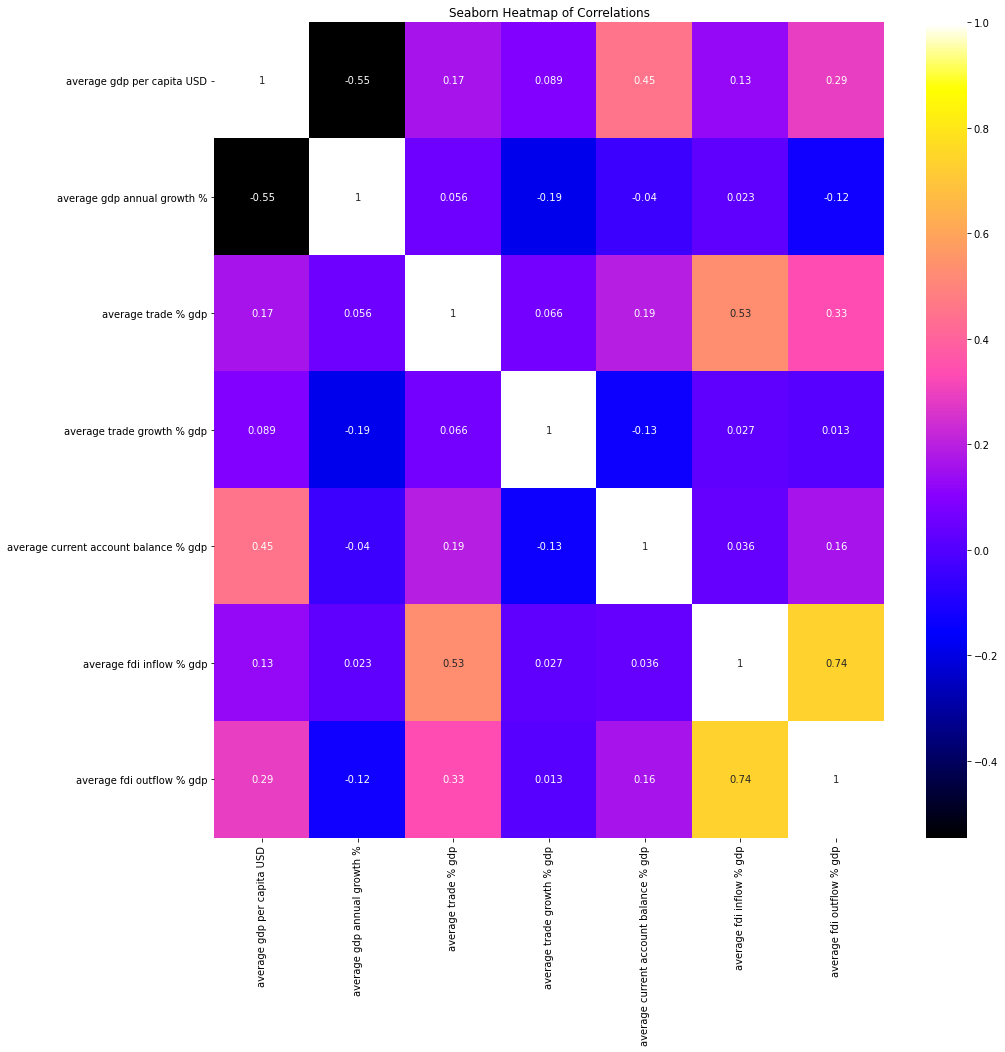

In [16]:
#heatmap of correlation
GFTC_1=GFTC[['average gdp per capita USD',
       'average gdp annual growth %', 'average trade % gdp',
       'average trade growth % gdp', 'average current account balance % gdp',
       'average fdi inflow % gdp', 'average fdi outflow % gdp']]
plt.figure(figsize=(15,15))
sns.heatmap(GFTC_1.corr(),cmap='gnuplot2',annot=True)
plt.title('Seaborn Heatmap of Correlations')
plt.show()

The **<span style='color:purple'>Heatmap</span>** suggests that the strength of the correlations between the variables are not strong, with no correlations above 0.7 to be considered generally as a strong correlation. From the heatmap, the majority are weak correlations with only a few moderate correlations (~0.5). Of note, based on the dataset, the annual GDP growth is only weakly correlated with all other variabless of Trade and FDI. We delve in to sort the pairs of values by their R scores to identify the strongest part. The top three pairs with moderate correlations (R ~ 0.5) is for (fdi-inflow, trade % gdp), (current account balance % gdp, gdp per capita) and (fdi inflow % gdp, fdi inflow % gdp)  

In [17]:
corr=GFTC_1.corr().abs()
s=corr.unstack().sort_values(kind='quicksort')
s=pd.DataFrame(s).sort_values(by=0,ascending=False)
s=s.drop_duplicates()
s=s.iloc[1:,:]
s

,,0
average fdi inflow % gdp,average fdi outflow % gdp,0.739594
average gdp per capita USD,average gdp annual growth %,0.545278
average trade % gdp,average fdi inflow % gdp,0.534974
average current account balance % gdp,average gdp per capita USD,0.454137
average trade % gdp,average fdi outflow % gdp,0.333543
average gdp per capita USD,average fdi outflow % gdp,0.292875
average current account balance % gdp,average trade % gdp,0.191757
average trade growth % gdp,average gdp annual growth %,0.186625
average trade % gdp,average gdp per capita USD,0.166457
average current account balance % gdp,average fdi outflow % gdp,0.161842


####  4.2: Seaborn Pairplot

We will be further exploring the relations between the variables through Scatter Plot Matrices (SPLOM) which involves producing scatter plots between two different variables but amalgamated into a matrix to allowa quick view of all the bivariate relations at a glance. The Seaborn **<span style='color:purple'>pairplot</span>** function that quickly generates the SPLOM and plots pairwise relations via scatterplots for all quantitative variables that the function is applied to. This allows an easy single-look at all the pairwise relations. By setting the **hue** parameter, we can further differentiates the display of the data points by ther different classes of a categorical variable. In the case below, we shall use call **<span style='color:purple'>pairplot</span>** on GFTC, and set the **hue** parameter to 'Income Group' which then differentiates the data point using different colors for the respective Income Groups that each country belongs to. The **palette** parameter allows us to specify the set of colors to map to the different classes which the data points belongs to in the categorical variable specified in **hue**.

<Figure size 1440x1440 with 0 Axes>

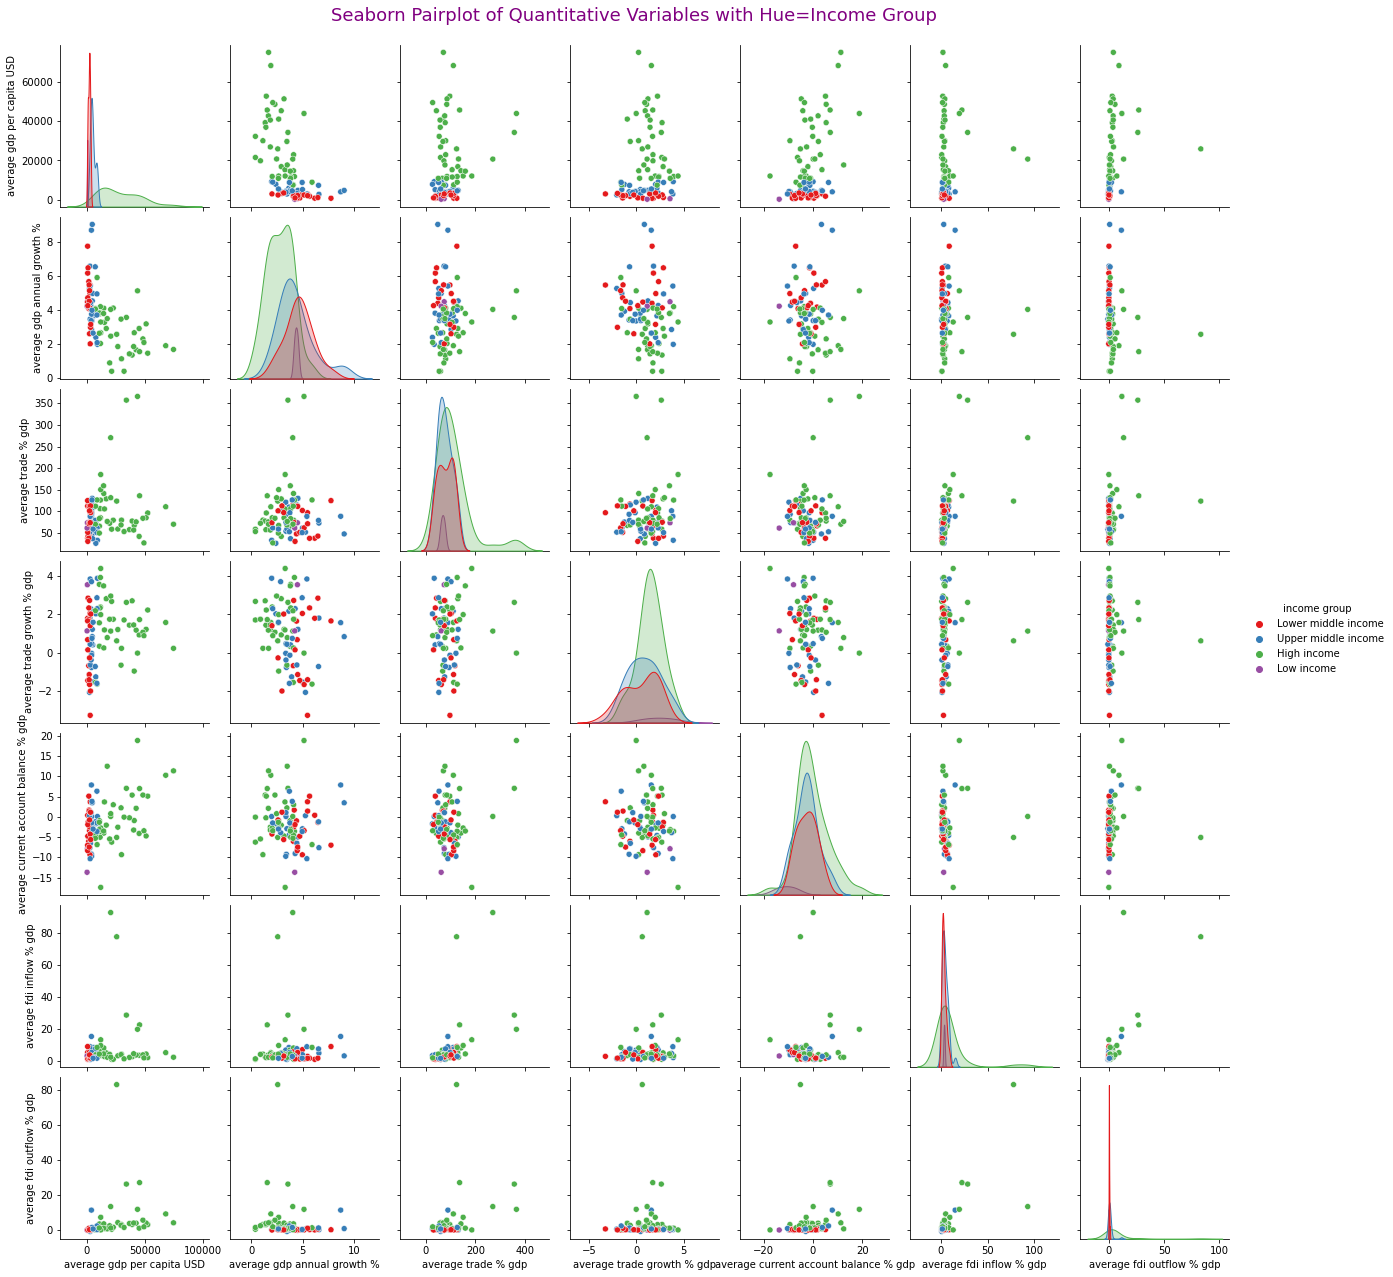

In [18]:
#pairplot with hue set to Income Group
plt.figure(figsize=(20,20))
sns.pairplot(GFTC,hue='income group',palette='Set1')
# x and y are the coordinates based on the current axes
plt.title('Seaborn Pairplot of Quantitative Variables with Hue=Income Group',fontsize=18,color='purple',x=-3.0,y=7.5)
plt.show()

We next call for a **<span style='color:purple'>pairplot</span>** here, but set the **hue** to 'Region' and the default **palette**  

<Figure size 1440x1440 with 0 Axes>

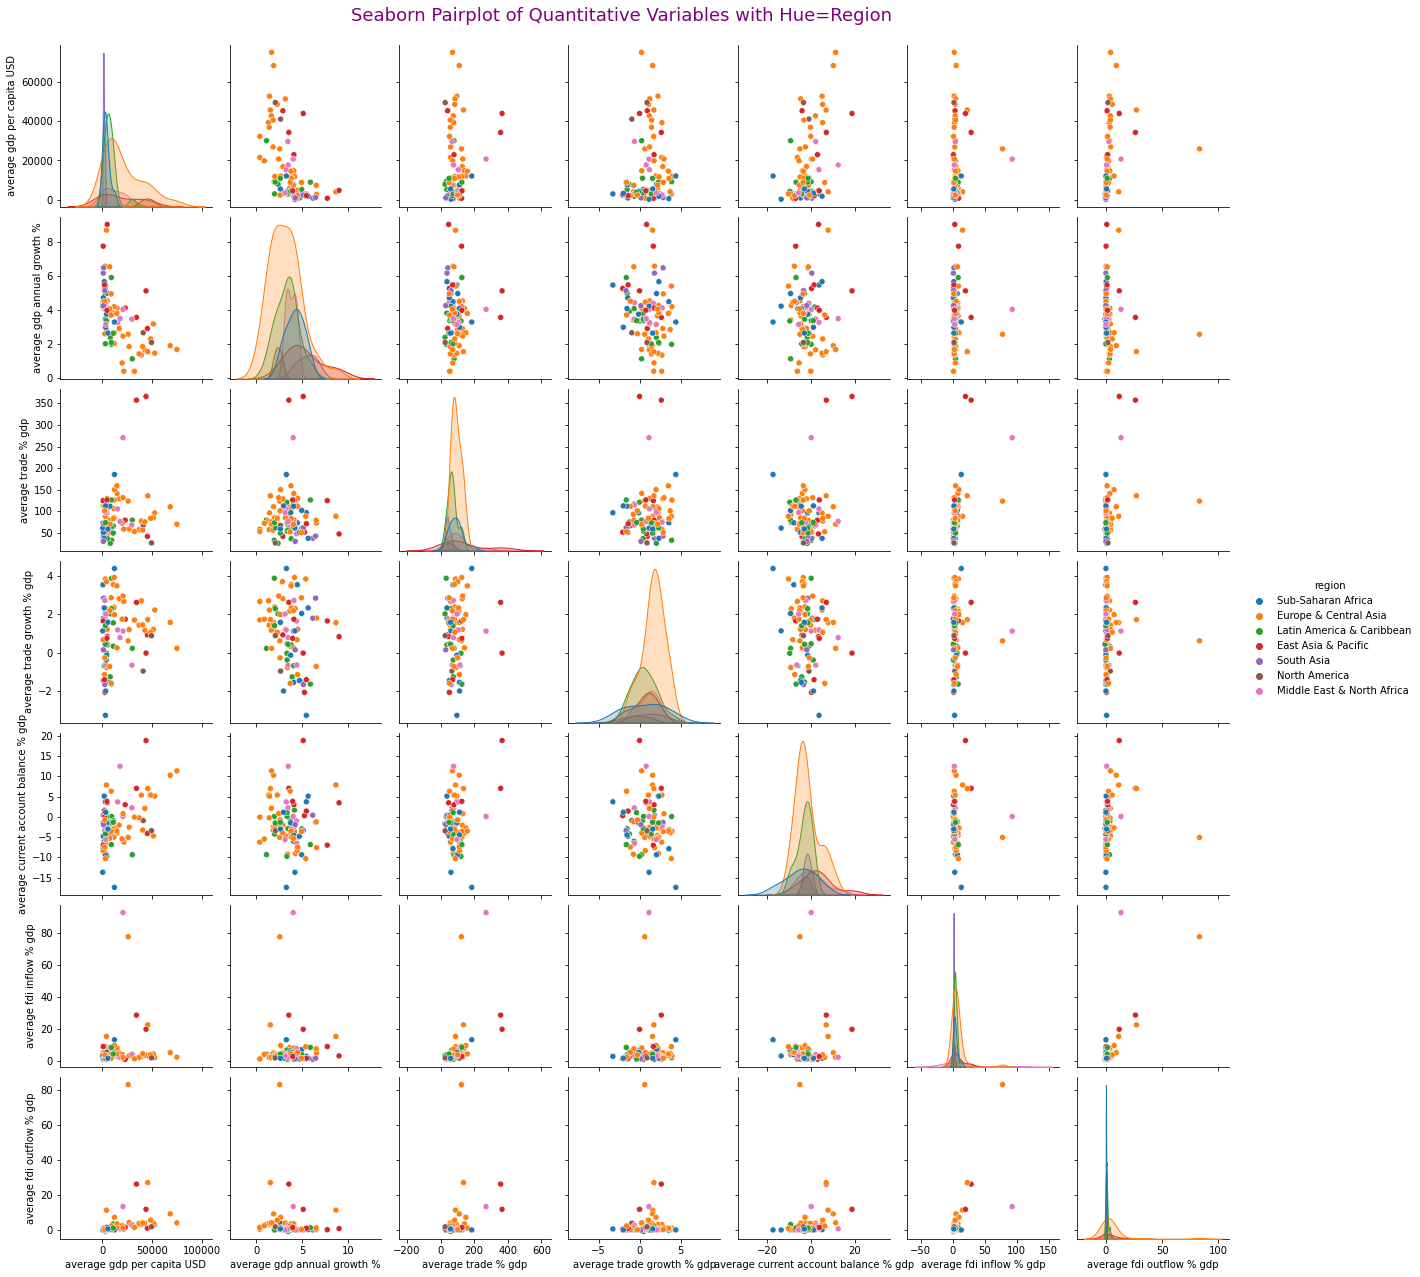

In [19]:
#pairplot
plt.figure(figsize=(20,20))
sns.pairplot(GFTC,hue='region')
plt.title('Seaborn Pairplot of Quantitative Variables with Hue=Region',fontsize=18,color='purple',x=-3.0,y=7.5)
plt.show()

The above two **<span style='color:purple'>pairplot</span>** with **Hue** for 'Income Group' and 'Region' did not display relations with strong correlations, consistent with the **<span style='color:purple'>heatmap</span>** 

####  4.2: Seaborn Scatterplot

We shall investigate more closely the relations between GDP growth and trade growth using the Seaborn **<span style='color:purple'>scatterplot</span>** to plot the trade growth versus gdp growth. The **<span style='color:purple'>scatterplot</span>** has parameters that allows us to simultaneously incorporate both the 'Income Group' and 'Region' categorical variables into the **<span style='color:purple'>scatterplot</span>** . Besides **hue** parameter that had been described earlier, the **style** parameter allow us to set different markers for the different classes in a categorical variable.   

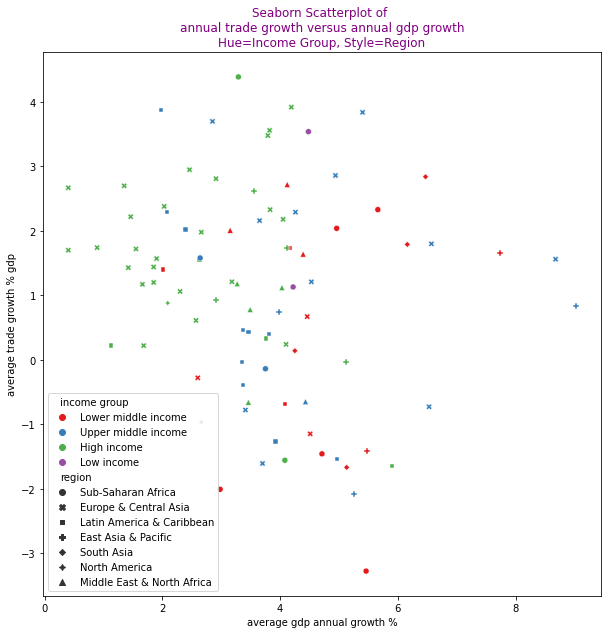

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=GFTC,x='average gdp annual growth %',y='average trade growth % gdp',hue='income group',style='region',palette='Set1')
plt.title('Seaborn Scatterplot of \nannual trade growth versus annual gdp growth\nHue=Income Group, Style=Region',x=0.5,y=1.0,fontsize=12,color='purple')
plt.show()

No discernable relations can be easily observed in the **<span style='color:purple'>scatterplot</span>**  above. 

####  4.3: Seaborn Jointplot

We shall now investigate the data using the Seaborn **<span style='color:purple'>jointplot</span>** function, which offers features beyond the  **<span style='color:purple'>scatterplot</span>**. We plot the **<span style='color:purple'>jointplot</span>** for annual gdp growth versus trade growth. Besides the **<span style='color:purple'>jointplot</span>** having a **<span style='color:purple'>scatterplot</span>** functionality within, it also has **hue** to allow differentiaing the different classes of the categorical variable set in the **hue**. In addition, the **<span style='color:purple'>jointplot</span>** also plots the univariate distributions of the two quantitative variables on separate axis, with a separate distribution for each the classes of the categorical variables indicated in the **hue**. We will therefore plot two   **<span style='color:purple'>jointplot</span>** using the **hue** for 'Income Group' and 'Region' in each of the two plots, and with **palette** set to different color maps.  

<Figure size 720x720 with 0 Axes>

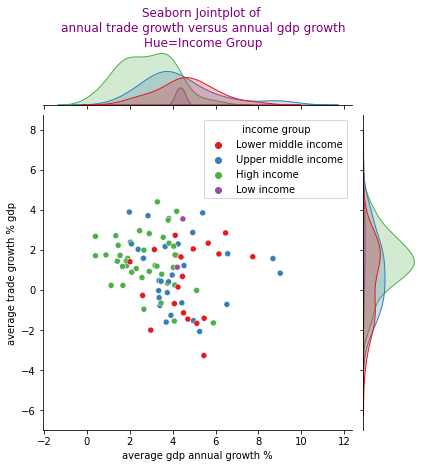

In [21]:
plt.figure(figsize=(10,10))
sns.jointplot(data=GFTC,x='average gdp annual growth %',y='average trade growth % gdp',hue='income group',palette='Set1')
plt.title('Seaborn Jointplot of \nannual trade growth versus annual gdp growth\nHue=Income Group',x=-3,y=1.2,fontsize=12,color='purple')
plt.show()

<Figure size 720x720 with 0 Axes>

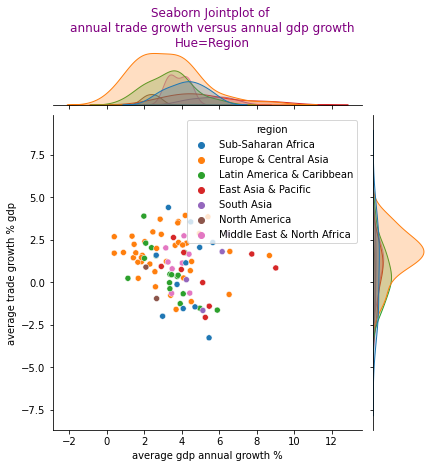

In [22]:
plt.figure(figsize=(10,10))
sns.jointplot(data=GFTC,x='average gdp annual growth %',y='average trade growth % gdp',hue='region')
plt.title('Seaborn Jointplot of \nannual trade growth versus annual gdp growth\nHue=Region',x=-3,y=1.2,fontsize=12,color='purple')
plt.show()

No discernable relations can be easily observed in the two **<span style='color:purple'>jointplot</span>**  above, consistent with the weak correlations observed in this dataset for gdp growth and trade growth 

####  4.4: Seaborn FacetGrid

The scatter plots in the **<span style='color:purple'>jointplot</span>** as used above, while allowing us to incorporate the categorical variables through the *hue* function, displays the different classes of the categorical variable on a single plot. Similarly, **<span style='color:purple'>scatterplot</span>**, while using the *hue* and *style* parameters to reflect the different classes of two categorical variables, also displays on a single plot. We will therefore use the Seaborn  **<span style='color:purple'>FacetGrid</span>** to produce a scatter plot matrix for two quantitative variables, but with each scatter plot reflecting the combination of one class each from two categorical variables. In the example below, we use the **<span style='color:purple'>FacetGrid</span>** to plot the scatter plots for trade growth % gdp versus gdp growth %, with the columns of the **<span style='color:purple'>FacetGrid</span>** as the different income groups, and the rows of **<span style='color:purple'>FacetGrid</span>**  as different regions. To do this, we first initialize the **<span style='color:purple'>FacetGrid</span>** object. In this object, we set the *col*='income group', the *row*='regions and the *margin_titles*=*<span style='color:green'>True</span>* to set the titles of the row variables at the right of the last column. We then call the **<span style='color:purple'>FacetGrid.map</span>** to apply the functions to the data. 

<Figure size 1440x1440 with 0 Axes>

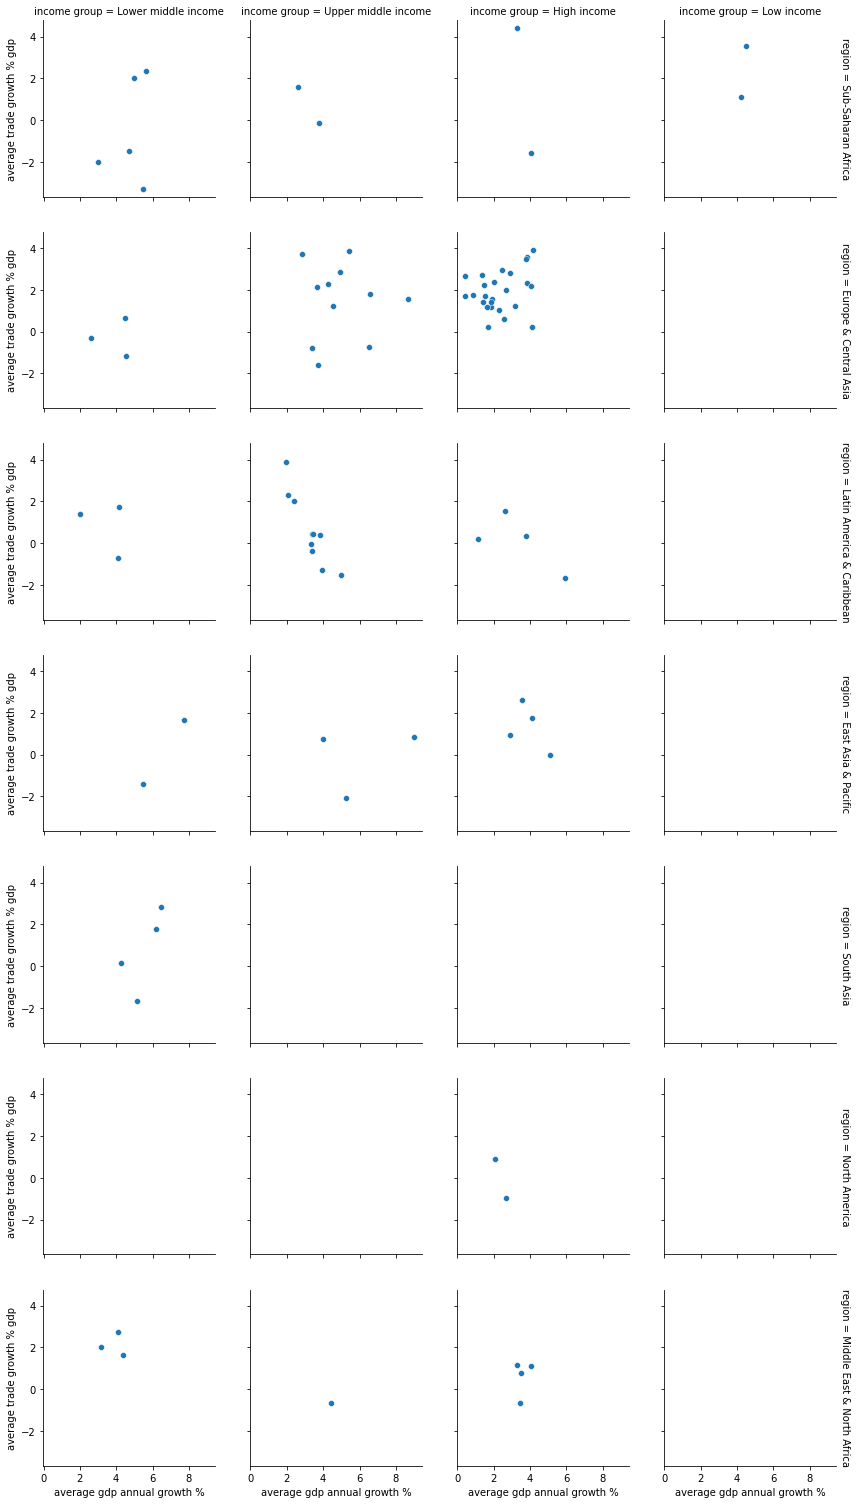

In [23]:
plt.figure(figsize=(20,20))
m=sns.FacetGrid(GFTC,col="income group",row='region',margin_titles=True)
m.map(sns.scatterplot,'average gdp annual growth %','average trade growth % gdp')
plt.subplots_adjust(hspace=0.2,wspace=0.2)

No discernable relations can be easily observed in the **<span style='color:purple'>FacetGrid</span>** above, consistent with the weak correlations observed in this dataset for gdp growth and trade growth. In addition, somee of the subplots are empty, reflecting that there is no country in the data-set that falls with this combination of classes. e..g. 'low income' for 'Income Group' and 'Middle East & North Africa' in 'Regions'. As the dataset only contains a small number of data points i.e. 115 countries in the data-set used, we must be careful of sub-plots in the **<span style='color:purple'>FacetGrid</span>** having too little data points that could give rise to spurious observations. 

To better visualize the impact of 'Region' and 'Income Group' respectively, we therefore plot the **<span style='color:purple'>FacetGrid</span>** but using only one categorical variable for each of the **<span style='color:purple'>FacetGrid</span>**. Two **<span style='color:purple'>FacetGrid</span>** will be produced, one for 'Income Group' and 'Region'. These will be single-row **<span style='color:purple'>FacetGrid</span>**, with each column representing one class of the categorical variable being studied. We do this by setting the *col* in the **<span style='color:purple'>FacetGrid</span>** as the categorical variable being studied, and omitting the *row*.

<Figure size 1440x1440 with 0 Axes>

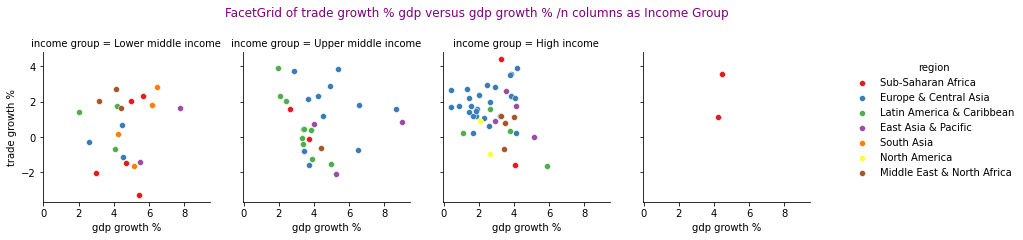

<Figure size 2160x2160 with 0 Axes>

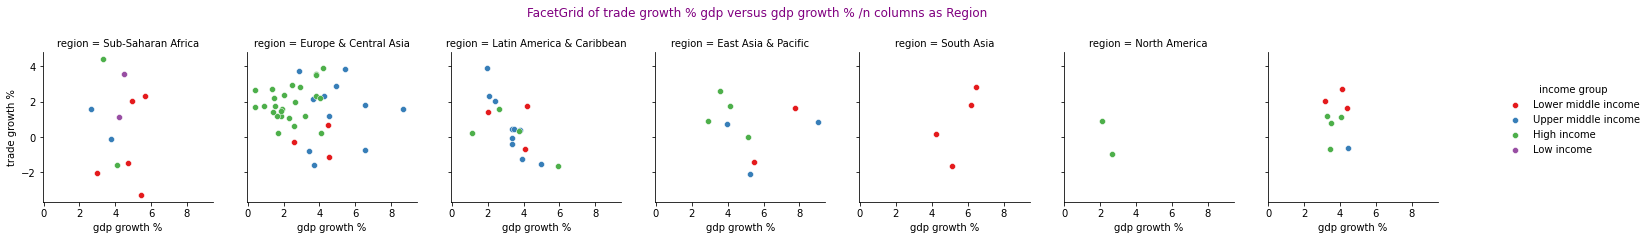

In [24]:
#FacetGrid with cols as 'income group'
plt.figure(figsize=(20,20))
m=sns.FacetGrid(GFTC,col="income group",hue='region',margin_titles=True,palette='Set1')
m.map_dataframe(sns.scatterplot,'average gdp annual growth %','average trade growth % gdp')
m.set_axis_labels('gdp growth %','trade growth %')
m.add_legend()
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.title('FacetGrid of trade growth % gdp versus gdp growth % /n columns as Income Group',x=-1,y=1.2,fontsize=12,color='purple')
plt.show()

#FacetGrid with cols as 'region'
plt.figure(figsize=(30,30))
m=sns.FacetGrid(GFTC,hue="income group",col='region',margin_titles=True,palette='Set1')
m.map_dataframe(sns.scatterplot,'average gdp annual growth %','average trade growth % gdp')
m.set_axis_labels('gdp growth %','trade growth %')
m.add_legend()
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.title('FacetGrid of trade growth % gdp versus gdp growth % /n columns as Region',x=-3,y=1.2,fontsize=12,color='purple')
plt.show()


No discernable relations can be easily observed in the two **<span style='color:purple'>FacetGrid</span>**  above, consistent with the weak correlations observed in this dataset for gdp growth and trade growth. 

####  4.4: Additional features in Seaborn Jointplot and Scatterplots

The R scores indicated that the top three pairs with moderate correlations (R ~ 0.5) are for (fdi inflow % gdp, trade % gdp), (current account balance % gdp, gdp per capita) and (fdi inflow % gdp, fdi inflow % gdp). We shall explore the relations between fdi inflow and trade as % GDP via **<span style='color:purple'>jointplot</span>** and **<span style='color:purple'>scatterplot</span>**. We will plot the   **<span style='color:purple'>scatterplot</span>**  of fdi inflow versus trade as % gdp below, setting **hue** as 'Income Group' and marker **style** as 'Regions** similar to 4.3. 

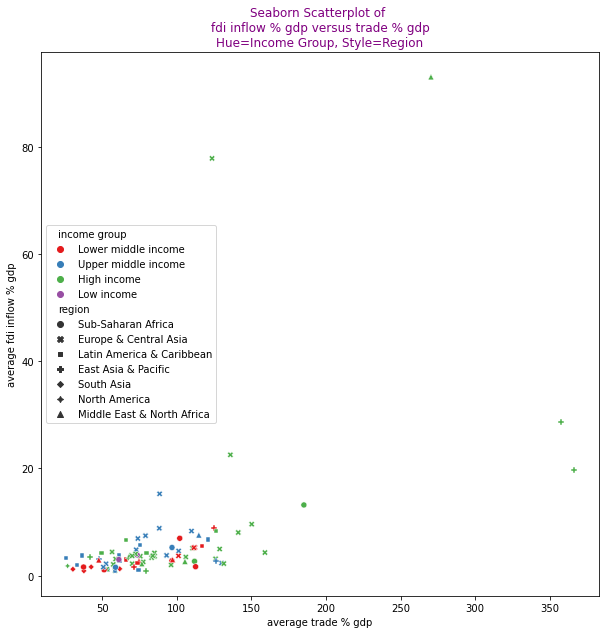

In [25]:
#average trade % versus average fdi inflow%
plt.figure(figsize=(10,10))
sns.scatterplot(data=GFTC,x='average trade % gdp',y='average fdi inflow % gdp',hue='income group',style='region',palette='Set1')
plt.title('Seaborn Scatterplot of \nfdi inflow % gdp versus trade % gdp\nHue=Income Group, Style=Region',x=0.5,y=1.0,fontsize=12,color='purple')
plt.show()

The **<span style='color:purple'>scatterplot</span>**  above indicates a positive correlation between trade as % gdp and fdi inflow as % gdp. We will proceed to use  **<span style='color:purple'>jointplot</span>** to study the effects of 'Income Group' and 'Region' respectively. For these plots, we shall implement the **kind** parameter in the **<span style='color:purple'>jointplot</span>**. The **kind** specify the kind of plots to draw, and we shall be using **kind**=*kde* in the subsequent plots. The *kde* stands for *kernel density estimate* which are the probability densitiy curves of the data points occuring with this distribution in the plot.    

Text(-3, 1.2, 'Seaborn Jointplot of \nfdi inflow % gdp versus trade % gdp\nHue=Region')

<Figure size 720x720 with 0 Axes>

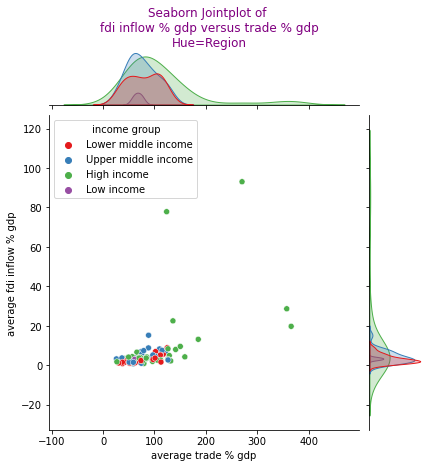

In [27]:
plt.figure(figsize=(10,10))
sns.jointplot(data=GFTC,x='average trade % gdp',y='average fdi inflow % gdp',hue='income group',palette='Set1')
plt.title('Seaborn Jointplot of \nfdi inflow % gdp versus trade % gdp\nHue=Region',x=-3,y=1.2,fontsize=12,color='purple')

LinAlgError: singular matrix

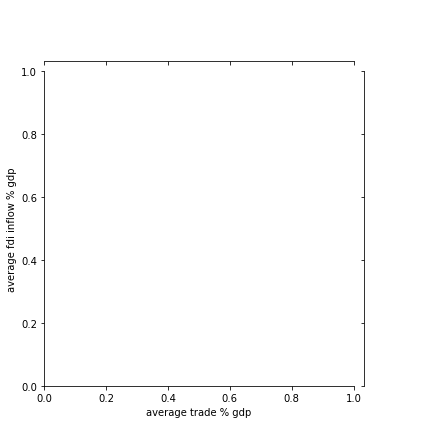

In [30]:
sns.jointplot(data=GFTC,x='average trade % gdp',y='average fdi inflow % gdp',kind='kde',hue='income group',palette='Set1')
#sns.jointplot(data=GFTC,x='average trade % gdp',y='average fdi inflow % gdp',kind='kde',hue='income group',palette='Set1')
plt.title('Seaborn Jointplot (KDE) of \nfdi inflow % gdp versus trade % gdp\nHue=Region',x=-3,y=1.2,fontsize=12,color='purple')
plt.show()

The above two  **<span style='color:purple'>jointplot</span>** with **hue** as 'Income Group' shows not discernable patterns in the distribution by income group of the countries.

In [ ]:
plt.figure(figsize=(10,10))
sns.jointplot(data=GFTC,x='average trade % gdp',y='average fdi inflow % gdp',hue='region')
plt.title('Seaborn Jointplot of \nfdi inflow % gdp versus trade % gdp\nHue=Region',x=-3,y=1.2,fontsize=12,color='purple')
plt.show()

The above  **<span style='color:purple'>jointplot</span>** with **hue** as 'Regions' shows not discernable patterns in the distribution by regions of the countries.

We shall next visualize the **<span style='color:purple'>jointplot</span>**  for trade % gdp versus fdi inflow % gdp without differentiating between the 'Income Group' and/or 'Region'. We will use **kind**=*kde* and **kind**=*hex* as the plot type. *hex* plots a bivariate histogram using hexagonal bins on the axes. The above two **kind** plots are useful to understand the overall distribution and concentration of the data points on the **<span style='color:purple'>jointplot</span>**.    

In [ ]:
#average trade % versus average fdi inflow%
plt.figure(figsize=(10,10))
sns.jointplot(data=GFTC,x='average trade % gdp',y='average fdi inflow % gdp',kind='kde',color='deepskyblue')
plt.title('Seaborn Jointplot (KDE) of \nannual trade growth versus annual gdp growth',x=-3,y=1.2,fontsize=12,color='purple')
sns.jointplot(data=GFTC,x='average trade % gdp',y='average fdi inflow % gdp',kind='hex',color='dodgerblue')
plt.title('Seaborn Jointplot (hex) of \nannual trade growth versus annual gdp growth',x=0.5,y=1.2,fontsize=12,color='purple')
plt.show()

The above two  **<span style='color:purple'>jointplot</span>** with **kind** as *kde* and *hex* respectively shows that most of the countries are in the bottom right quadrant with trade % gdp of less than ~150% and  fdi inflow % gdp of less than ~10%

#### 4.5: Combinations

We will also use **<span style='color:purple'>scatterplot</span>** to study the visualization between the current account balance % gdp and gdp per capita. For the  **<span style='color:purple'>scatterplot</span>**, we will set **hue** as 'Regions'. This is given that the 'Income Group' will be accounted for in the gdp per capita variable. 

In [ ]:
#average current account versus average gdp per capita
plt.figure(figsize=(10,10))
sns.scatterplot(data=GFTC,x='average current account balance % gdp',y='average gdp per capita USD',hue='region')
plt.title('Seaborn  of \nannual current account balance versus gdp per capita\nHue=Income Group',x=0.5,y=1.0,fontsize=12,color='purple')
plt.show()

From the above **<span style='color:purple'>scatterplot</span>** and **<span style='color:purple'>jointplot</span>**, there is a positive correlation between current account balance % gdp and gdp per capita. Of note, the 'high income' and 'upper middle income' countries tend to have postive and larger current account balance. We will use combine the **<span style='color:purple'>scatterplot</span>** and **<span style='color:purple'>kdeplot</span>** onto the same plot to better highlight the relations between current account balance % gdp and gdp per capita. Akin the the **kind**=*kde* in **<span style='color:purple'>jointplot</span>**, the **<span style='color:purple'>kdeplot</span>** will plot the probability density curves of the distribution onto the bivariate plot. We can also enhance the asethetics of the **<span style='color:purple'>kdeplot</span>** by setting the **fill**=*True* to fill the spaces between the probability density curves, set the **level** to a value e.g. *20* that outlines the number of probability density curves and hence the gradation of the fill, **threshold**=*0* which sets 0 as the level to draw the probability density curves and hence ensure the whole plot is filled, as well as the appropriate **cmap** setting for the colormap which we set as *mako*.

In [ ]:
#average current account versus average gdp per capita
plt.figure(figsize=(10,10))
sns.kdeplot(data=GFTC,x='average current account balance % gdp',y='average gdp per capita USD',fill=True,levels=20,thresh=0,cmap='mako')
sns.scatterplot(data=GFTC,x='average current account balance % gdp',y='average gdp per capita USD',color='white')
plt.title('Seaborn Histplot of \nannual current account balance versus gdp per capita',x=0.5,y=1.0,fontsize=12,color='purple')
plt.show()

Finally, we will explore the relations between current account balance % gdp and gdp per capita using the Seaborn **<span style='color:purple'>relplot</span>** . This allows the incorporation of a three quantitative variable onto the scatter plot via the varying size of the markers, with the larger the value, the larger the size of the marker. This three-way representation of quantitative variables allow the discernment of additional insights from the visualization. In the plot below, we will set the **weight**=*trade % gdp*. The visualization not surprisingly tells us that besides the countries in higher income groups having more positive current account balance % gdp, they also tend to have larger trade % gdp.

In [ ]:
plt.figure(figsize=(20,20))
sns.relplot(data=GFTC,x='average current account balance % gdp',y='average gdp per capita USD',hue='income group',size='average trade % gdp',alpha=0.8,palette='Set1')
plt.show()